In [1]:
# https://www.kaggle.com/datasets/mathchi/diabetes-data-set
# Diabetes Dataset 
# Number of times pregnant จำนวนครั้งที่ตั้งครรภ์ 
# Plasma glucose ความเข้มข้นของกลูโคสในช่องปาก ตัดเลข 0
# Diastolic blood pressure ความดันโลหิต ตัดเลข 0
# Triceps skin fold thickness ความหนาไขมันผิวหนัง ตัดเลข 0
# 2-Hour serum insulin (Mu U/ml) ความเข้มข้นของอินซูลิน หลังฉีดไป 2 ชม. ตัดเลข 0
# BMI ดัชนีมวลกาย ตัดเลข 0
# Diabetes pedigree function ความเสี่ยงโรคเบาหวานที่มาจาก พันธุกรรม
# Age อายุ
# outcome เป็น และ ไม่เป็น 
# https://www.youtube.com/watch?v=RaN8tyledJ4
# https://www.youtube.com/watch?v=E0gaPgiISoU&list=PL-QRwhZe4lltkA6KaWkSYMrl63YaFEeLz&index=1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.shape

(768, 9)

In [4]:
#เช็คแต่ละ colum มีค่า 0 กี่ตัว ทำไมถึงทำเพราะว่า เช่น แบบ BMI 0 คือ มันเหมือนเป็น ข้อมูลที่ เหมือนกับ ค่า NaN
 
print(df[df['Glucose'] == 0].shape[0])
print(df[df['BloodPressure'] == 0].shape[0])
print(df[df['SkinThickness'] == 0].shape[0])
print(df[df['Insulin'] == 0].shape[0])
print(df[df['BMI'] == 0].shape[0])

5
35
227
374
11


In [5]:
#เอาา ค่าเฉลี่ยไปเติม แทน เลข 0
#ทำไมถึง แทนที่จะตัดออกไปเลย ทำไมถึงเอา ค่าเฉลี่ยมาแทน
#ตอบ เพราะว่า ดูจาก ด้านบน เลข 0 เยอะมาก ซึ่ง มันมีแค่ 700 กว่า Row เอง แต่ เลข 0 ที่มีมัน 500+แล้ว ถ้าตัดข้อมูลคือ น้อยมาก
df["Glucose"] = df['Glucose'].replace(0,df["Glucose"].mean())
df["BloodPressure"] = df['BloodPressure'].replace(0,df["BloodPressure"].mean())
df["SkinThickness"] = df['SkinThickness'].replace(0,df["SkinThickness"].mean())
df["Insulin"] = df['Insulin'].replace(0,df["Insulin"].mean())
df["BMI"] = df['BMI'].replace(0,df["BMI"].mean())

In [6]:
print(df[df['Glucose'] == 0].shape[0])
print(df[df['BloodPressure'] == 0].shape[0])
print(df[df['SkinThickness'] == 0].shape[0])
print(df[df['Insulin'] == 0].shape[0])
print(df[df['BMI'] == 0].shape[0])

0
0
0
0
0


0    500
1    268
Name: Outcome, dtype: int64

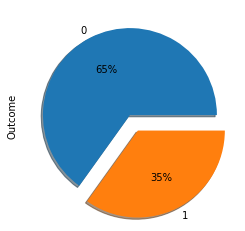

In [7]:
#ดู ข้อมูลว่า เป็นเบาหวาน กี่คน ไม่เป็นกี่คน เพื่อดูว่า ข้อมูลชุดนี้มันจะ ทำนายได้จริงๆใช่มั้ย หรือมีข้อมูลเพียงพอรึเปล่า
# ถ้า common เซน คิดว่า 40 60 กำลังสวย ถ้า 50 50 มันอาจจะทำนายยาก 
df["Outcome"].value_counts().plot(kind="pie",autopct='%1.0f%%',shadow=True,explode=[0,0.2])
df["Outcome"].value_counts()

In [8]:
#ดูว่า จะใช้ model อะไร 
# sns.pairplot(data=df,hue="Outcome")

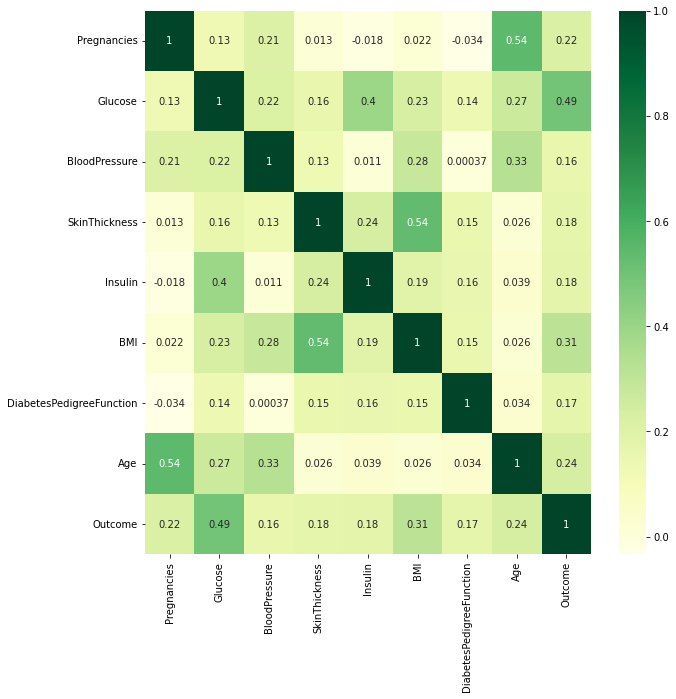

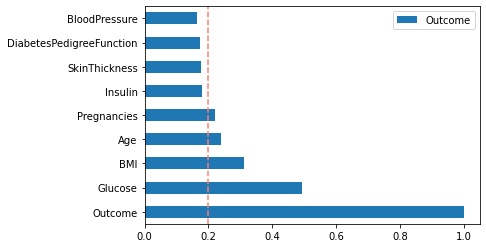

In [9]:
# df[df.columns] ดูความสัมพัน ระหว่าง เป็น กับ ไม่เป็น ว่า ฟรีเจอไหน มันเกี่ยวข้องสูง
# Filter Method คือการ ดูความสัมพันธ์ ของ ฟีเจอร์ โดยเราจะยึด ฟีเจอร์ที่เป็นเฉลย แล้วดูว่า มีฟีเจอร์ไหนบ้างที่มีความสัมพันธ์ความฟีเจอร์เฉลยมาก
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGn")
corr2 = df.corr().T[["Outcome"]].sort_values("Outcome",ascending=False)
corr2.plot(kind="barh") # >= 0.2
plt.axvline(0.2,color="salmon",linestyle="--")

In [10]:
df.columns
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]
cols_important = ["Glucose","BMI","Age","Pregnancies"]
# cols_important = ["Glucose","BMI","Age","Pregnancies","Insulin"]
# cols_important = ["Glucose","BMI","Age"]
# cols_important = ["Glucose","BMI"]
# Glucose	    0.492908 > .2
# BMI	        0.312254
# Age	        0.238356
# Pregnancies	0.221898   
   
# x = df[cols]
x = df[cols_important]
y = df["Outcome"]


In [11]:
from sklearn.preprocessing import StandardScaler
z = StandardScaler()
z.fit(x)
zz = z.fit_transform(x)
dz = pd.DataFrame(zz,columns=cols_important)
# dz = pd.DataFrame(zz,columns=cols)
xz = dz[cols_important]
# xz = dz[cols]
yz = df["Outcome"]
dz

,Glucose,BMI,Age,Pregnancies
0,0.865276,0.167255,1.425995,0.639947
1,-1.205989,-0.851535,-0.190672,-0.844885
2,2.015979,-1.331821,-0.105584,1.233880
3,-1.074480,-0.633222,-1.041549,-0.844885
4,0.503626,1.549899,-0.020496,-1.141852
...,...,...,...,...
763,-0.679954,0.065376,2.532136,1.827813
764,0.010468,0.632988,-0.531023,-0.547919
765,-0.022409,-0.909751,-0.275760,0.342981
766,0.141977,-0.342140,1.170732,-0.844885


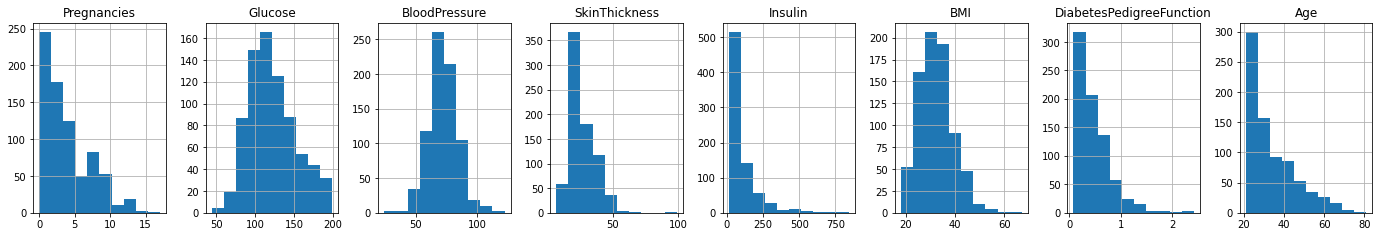

In [12]:
# df[cols_important].hist(layout=(1,len(cols)),figsize=(3*len(cols),3.5));
df[cols].hist(layout=(1,len(cols)),figsize=(3*len(cols),3.5));

In [13]:
# dz[cols_important].hist(layout=(1,len(cols)),figsize=(3*len(cols),3.5),color="red");
dz[cols].hist(layout=(1,len(cols)),figsize=(3*len(cols),3.5),color="red");

KeyError: "['BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction'] not in index"

In [21]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(zz,y,test_size=0.2,random_state=7)
# แบ่งข้อมูลสำคัญเหมือนกัน ป้องกัน overfitting เพราะว่า เวลามันเจอ ข้อมูลใหม่ที่ไม่ใช่ข้อมูล train มันก็ทำนายผิด เพราะว่ามันชินกับตัวของ train

## หา model ที่ดีที่สุด 


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [23]:
LKG = [
    [LogisticRegression(solver="liblinear",multi_class="ovr"),"LogisticRegression"]
    ,[KNeighborsClassifier(n_neighbors=3),"KNeighborsClassifier k = 3"]
    ,[KNeighborsClassifier(n_neighbors=5),"KNeighborsClassifier k = 5"]
    ,[GaussianNB(),"naive_bayes"]
    ,[SVC(),"SVC"]
    # ,[RandomForestClassifier(n_estimators=250),"RandomForestClassifier"]
]

Model : LogisticRegression , Accuracy : 0.7857142857142857
Data ไม่เป็นโรคเบาหวาน : 97 คน | เป็นโรคเบาหวาน : 57 คน
TN = เปรียบเทียบระหว่างข้อมูลจริงกับข้อมูลทำนายว่า ไม่เป็นโรคเบาหวาน 86 คน
TP = เปรียบเทียบระหว่างข้อมูลจริงกับข้อมูลทำนายว่า เป็นโรคเบาหวาน 35 คน
FN = ข้อมูลจริงเป็นโรคเบาหวานแต่โมเดลทำนายไม่เป็นเบาหวาน 11 คน
FP = ข้อมูลจริงไม่เป็นโรคเบาหวานแต่โมเดลทำนายเป็นเบาหวาน 22 คน


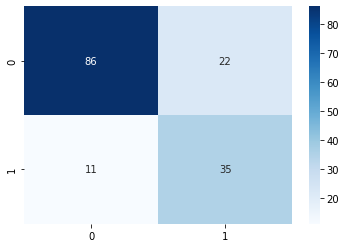

----------------------------------------------------------------------------------------------------
Model : KNeighborsClassifier k = 3 , Accuracy : 0.7727272727272727
Data ไม่เป็นโรคเบาหวาน : 97 คน | เป็นโรคเบาหวาน : 57 คน
TN = เปรียบเทียบระหว่างข้อมูลจริงกับข้อมูลทำนายว่า ไม่เป็นโรคเบาหวาน 82 คน
TP = เปรียบเทียบระหว่างข้อมูลจริงกับข้อมูลทำนายว่า เป็นโรคเบาหวาน 37 คน
FN = ข้อมูลจริงเป็นโรคเบาหวานแต่โมเดลทำนายไม่เป็นเบาหวาน 15 คน
FP = ข้อมูลจริงไม่เป็นโรคเบาหวานแต่โมเดลทำนายเป็นเบาหวาน 20 คน


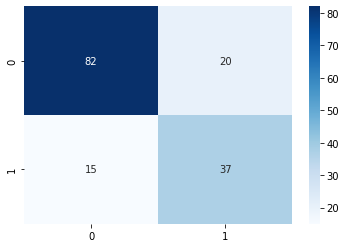

----------------------------------------------------------------------------------------------------
Model : KNeighborsClassifier k = 5 , Accuracy : 0.7857142857142857
Data ไม่เป็นโรคเบาหวาน : 97 คน | เป็นโรคเบาหวาน : 57 คน
TN = เปรียบเทียบระหว่างข้อมูลจริงกับข้อมูลทำนายว่า ไม่เป็นโรคเบาหวาน 81 คน
TP = เปรียบเทียบระหว่างข้อมูลจริงกับข้อมูลทำนายว่า เป็นโรคเบาหวาน 40 คน
FN = ข้อมูลจริงเป็นโรคเบาหวานแต่โมเดลทำนายไม่เป็นเบาหวาน 16 คน
FP = ข้อมูลจริงไม่เป็นโรคเบาหวานแต่โมเดลทำนายเป็นเบาหวาน 17 คน


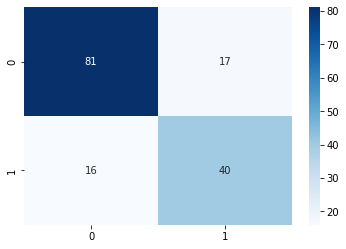

----------------------------------------------------------------------------------------------------
Model : naive_bayes , Accuracy : 0.7792207792207793
Data ไม่เป็นโรคเบาหวาน : 97 คน | เป็นโรคเบาหวาน : 57 คน
TN = เปรียบเทียบระหว่างข้อมูลจริงกับข้อมูลทำนายว่า ไม่เป็นโรคเบาหวาน 82 คน
TP = เปรียบเทียบระหว่างข้อมูลจริงกับข้อมูลทำนายว่า เป็นโรคเบาหวาน 38 คน
FN = ข้อมูลจริงเป็นโรคเบาหวานแต่โมเดลทำนายไม่เป็นเบาหวาน 15 คน
FP = ข้อมูลจริงไม่เป็นโรคเบาหวานแต่โมเดลทำนายเป็นเบาหวาน 19 คน


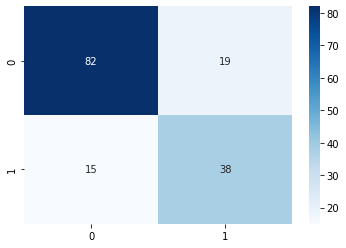

----------------------------------------------------------------------------------------------------
Model : SVC , Accuracy : 0.7922077922077922
Data ไม่เป็นโรคเบาหวาน : 97 คน | เป็นโรคเบาหวาน : 57 คน
TN = เปรียบเทียบระหว่างข้อมูลจริงกับข้อมูลทำนายว่า ไม่เป็นโรคเบาหวาน 86 คน
TP = เปรียบเทียบระหว่างข้อมูลจริงกับข้อมูลทำนายว่า เป็นโรคเบาหวาน 36 คน
FN = ข้อมูลจริงเป็นโรคเบาหวานแต่โมเดลทำนายไม่เป็นเบาหวาน 11 คน
FP = ข้อมูลจริงไม่เป็นโรคเบาหวานแต่โมเดลทำนายเป็นเบาหวาน 21 คน


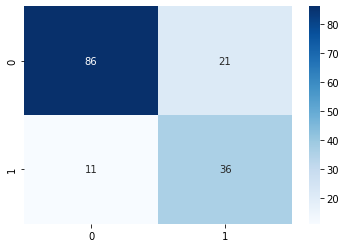

----------------------------------------------------------------------------------------------------


In [24]:
score_train = []
score_test = []
score_test_train_name = []
accuracy_score = []
for al in LKG:
    model = al[0]
    model.fit(x_train,y_train)
    p = model.predict(x_test)
    score_train.append(model.score(x_train,y_train))
    score_test.append(model.score(x_test,y_test))
    score_test_train_name.append([al[1],model.score(x_test,y_test),model.score(x_train,y_train)])
    print("Model : {} , Accuracy : {}".format(al[1],model.score(x_test,y_test)))
    a , b = y_test.value_counts()
    print(f"Data ไม่เป็นโรคเบาหวาน : {a} คน | เป็นโรคเบาหวาน : {b} คน")
    cm = metrics.confusion_matrix(p,y_test)
    TN ,FP ,FN ,TP = cm[0,0] , cm[0,1] , cm[1,0] , cm[1,1]
    print(f"TN = เปรียบเทียบระหว่างข้อมูลจริงกับข้อมูลทำนายว่า ไม่เป็นโรคเบาหวาน {TN} คน") #ยิ่งเข้าใกล้ข้อมูลทั้งหมดยิ่งดี
    print(f"TP = เปรียบเทียบระหว่างข้อมูลจริงกับข้อมูลทำนายว่า เป็นโรคเบาหวาน {TP} คน")  #ยิ่งเข้าใกล้ข้อมูลทั้งหมดยิ่งดี
    print(f"FN = ข้อมูลจริงเป็นโรคเบาหวานแต่โมเดลทำนายไม่เป็นเบาหวาน {FN} คน")  #ยิ่งน้อยยิ่งดี 0 คือดีเลย 
    print(f"FP = ข้อมูลจริงไม่เป็นโรคเบาหวานแต่โมเดลทำนายเป็นเบาหวาน {FP} คน")  #ยิ่งน้อยยิ่งดี
    # accuracy_score.append(metrics.accuracy_score(x_test,p))
    # print(metrics.confusion_matrix(p,y_test))
    # print(metrics.classification_report(p,y_test))
    sns.heatmap(cm,annot=True,cmap="Blues")
    plt.show()
    print("-"*100)


    

In [25]:
dx = pd.DataFrame(score_test_train_name,columns=["Model","Score_test","Score_train"])
dx.sort_values("Score_test",ascending=False)

,Model,Score_test,Score_train
4,SVC,0.792208,0.785016
0,LogisticRegression,0.785714,0.767101
2,KNeighborsClassifier k = 5,0.785714,0.827362
3,naive_bayes,0.779221,0.760586
1,KNeighborsClassifier k = 3,0.772727,0.859935


In [26]:
LKG = [
    # [LogisticRegression(solver="liblinear",multi_class="ovr"),"LogisticRegression"]
     [LogisticRegression(),"LogisticRegression"]
    ,[KNeighborsClassifier(n_neighbors=3),"KNeighborsClassifier k = 3"]
    ,[KNeighborsClassifier(n_neighbors=5),"KNeighborsClassifier k = 5"]
    ,[GaussianNB(),"naive_bayes"]
    ,[SVC(),"SVC"]
    # ,[MLPClassifier(),"MLP"]
    ,[RandomForestClassifier(n_estimators=250),"RandomForestClassifier"]
]

In [18]:
#การ cross_val_score ใช้เพื่อ model_secltion เลือกโมเดลที่ดีที่สุด
# เราจะกำหนด ค่า k-fold เช่น กำหนดให้ เท่ากับ 3 เจ้าตัวข้อมูล จะแบ่ง 3 ส่วน และมันจะทดลอง 3 ครั้ง

In [27]:
from sklearn.model_selection import cross_val_score
List_mean_var = []
for cs in LKG:
    ss = cross_val_score(estimator=cs[0],X=xz,y=yz,cv=10)
    List_mean_var.append([cs[1],ss.mean(),ss.var(),])


In [28]:
print("cross_val_score , cv = 10")
dcs = pd.DataFrame(List_mean_var,columns=["Model","Score_mean","Score_var"])
dcs["Score"] = dcs.Score_mean - dcs.Score_var
dcs.sort_values("Score",ascending=False)


cross_val_score , cv = 10


,Model,Score_mean,Score_var,Score
0,LogisticRegression,0.770865,0.001006,0.769859
3,naive_bayes,0.760492,0.002370,0.758122
4,SVC,0.752666,0.001874,0.750791
5,RandomForestClassifier,0.748616,0.004332,0.744284
2,KNeighborsClassifier k = 5,0.742139,0.002281,0.739858
1,KNeighborsClassifier k = 3,0.726504,0.002758,0.723746


In [31]:
from sklearn.linear_model import LogisticRegression
# from sklearn.neural_network import MLPClassifier
# model = MLPClassifier()
# model = SVC()
model = LogisticRegression(solver="liblinear",multi_class="ovr")
model.fit(xz,yz)
model.score(x_test,y_test)

c:\Users\Skril\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7922077922077922

In [32]:
predict = model.predict(x_test)
predict

c:\Users\Skril\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [33]:
from sklearn import metrics
metrics.confusion_matrix(y_test,predict)

array([[86, 11],
       [21, 36]], dtype=int64)

Data ไม่เป็นโรคเบาหวาน : 97 คน | เป็นโรคเบาหวาน : 57 คน
TN = เปรียบเทียบระหว่างข้อมูลจริงกับข้อมูลทำนายว่า ไม่เป็นโรคเบาหวาน 86 คน
TP = เปรียบเทียบระหว่างข้อมูลจริงกับข้อมูลทำนายว่า เป็นโรคเบาหวาน 36 คน
FN = ข้อมูลจริงเป็นโรคเบาหวานแต่โมเดลทำนายไม่เป็นเบาหวาน 21 คน
FP = ข้อมูลจริงไม่เป็นโรคเบาหวานแต่โมเดลทำนายเป็นเบาหวาน 11 คน


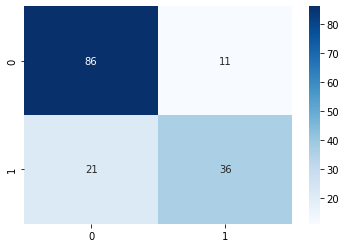

In [34]:
a , b = y_test.value_counts()
print(f"Data ไม่เป็นโรคเบาหวาน : {a} คน | เป็นโรคเบาหวาน : {b} คน")
cm = metrics.confusion_matrix(y_test,predict)
TN ,FP ,FN ,TP = cm[0,0] , cm[0,1] , cm[1,0] , cm[1,1]
print(f"TN = เปรียบเทียบระหว่างข้อมูลจริงกับข้อมูลทำนายว่า ไม่เป็นโรคเบาหวาน {TN} คน") #ยิ่งเข้าใกล้ข้อมูลทั้งหมดยิ่งดี
print(f"TP = เปรียบเทียบระหว่างข้อมูลจริงกับข้อมูลทำนายว่า เป็นโรคเบาหวาน {TP} คน")  #ยิ่งเข้าใกล้ข้อมูลทั้งหมดยิ่งดี
print(f"FN = ข้อมูลจริงเป็นโรคเบาหวานแต่โมเดลทำนายไม่เป็นเบาหวาน {FN} คน")  #ยิ่งน้อยยิ่งดี 0 คือดีเลย 
print(f"FP = ข้อมูลจริงไม่เป็นโรคเบาหวานแต่โมเดลทำนายเป็นเบาหวาน {FP} คน")  #ยิ่งน้อยยิ่งดี
sns.heatmap(cm,annot=True,cmap="Blues")
plt.show()

In [ ]:
"""
z = data - mean / (std)
"""
n1 = (6 - df["Pregnancies"].mean()) / (df["Pregnancies"].std())
n2 = (148.0 - df["Glucose"].mean()) / (df["Glucose"].std())
n3 = (72.0 - df["BloodPressure"].mean()) / (df["BloodPressure"].std())
n4 = (35.000000 - df["SkinThickness"].mean()) / (df["SkinThickness"].std())
n5 = (79.799479 - df["Insulin"].mean()) / (df["Insulin"].std())
n6 = (33.6	 - df["BMI"].mean()) / (df["BMI"].std())
n7 = (0.627 - df["DiabetesPedigreeFunction"].mean()) / (df["DiabetesPedigreeFunction"].std())
n8 = (50 - df["Age"].mean()) / (df["Age"].std())
n = np.array([n1,n2,n3,n4,n5,n6,n7,n8])
model.predict([n])
